# Procesamiento de datos hidrogeoquímicos
## Métodos de aprendizaje no supervisado
**Lenguaje de progrmación:** Python

- Peña-Mata, Claudia Elizabeth
- Pérez-Estrada, Adolfo

# Índice de contenido

0. **Librerías**
    

1. **Plantemiento del ejercicio**


2. **Colección de datos**


3. **Análisis estadísticos univariado (variables continuas)**

    3.1 Análisis estadístico básico
    
    
4. **Análisis bivariado**

    4.1 Análisis de dependencia global
    
    4.2 Análisis de regresión lineal
    
    
5. **Análisis multivariado**

    5.1 Detección de valores atípicos multivariados
    
6. **Estandarización de los datos**

7. **Selección de variables:**

    7.1 PCA
8. **Seleccion de numero de grupos**

    8.1 Método del codo

    8.2 Método de la silueda

    8.3 Método GAP
9. **Implementación de Métodos no Supervisados**

    9.1 Agrupamiento Jerárquico Aglomerativo (Simple)

    9.2 Agrupamiento divisivo
    
    K-Means y K-Medoides

# 0. Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from google.colab import files
# Importando librerías esenciales para análisis de datos y visualización

# Para manipulación y análisis de datos
import pandas as pd
# Para operaciones matemáticas y trabajo con arrays
import numpy as np
# Para visualización de datos estadísticos
import seaborn as sns
# Para gráficos y visualizaciones en general
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Librerías de scikit-learn para preprocesamiento

# Para realizar regresiones lineales
from sklearn.linear_model import LinearRegression
# Para análisis de componentes principales (PCA)
from sklearn.decomposition import PCA
# Para estandarizar características escalando a media = 0 y varianza = 1
from sklearn.preprocessing import StandardScaler

# Librerías de SciPy para estadísticas y operaciones matemáticas avanzadas

# Para calcular correlaciones de Spearman y Kendall
from scipy.stats import spearmanr, kendalltau
# Para un amplio rango de funciones estadísticas
from scipy import stats
# Para calcular la distancia de Mahalanobis
from scipy.spatial.distance import mahalanobis
# Para trabajar con la distribución Chi cuadrado
from scipy.stats import chi2

# Librerías de Statsmodels para modelos estadísticos y pruebas

# Para modelos estadísticos y tests
import statsmodels as sm
import statsmodels.api as sm
# Para gráficos Q-Q y otros plots de diagnóstico

from statsmodels.graphics.gofplots import qqplot, ProbPlot

# Librerías de Statsmodels para modelos estadísticos y pruebas

import matplotlib as mpl


In [ ]:
files.upload() # Cargar archivos desde PC. Si ya está cargado, saltar a la siguiente línea.

# 1. Introducción
**Introducción al Proyecto de Pozos de Agua Considerando Variables Hidrogeoquímicas**

El agua subterránea es un recurso vital que soporta tanto los ecosistemas naturales como el desarrollo humano. La calidad del agua subterránea es influenciada por procesos hidrogeoquímicos que ocurren en el subsuelo, lo que afecta su composición química y, por ende, su uso para consumo humano, agrícola e industrial. La evaluación detallada de las características hidrogeoquímicas del agua subterránea es esencial para su gestión sostenible y protección. Este proyecto se enfoca en analizar las variables hidrogeoquímicas de pozos de agua, incluyendo temperatura ('T'), pH, potencial de óxido-reducción ('Eh'), y concentraciones de iones como 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-' y 'SiO2'.

El objetivo es llevar a cabo un análisis exploratorio de datos (AED) para entender las relaciones entre estas variables y cómo podrían influir en la calidad del agua subterránea. El AED incluirá análisis univariados, bivariados y multivariados, así como la implementación de métodos de aprendiazaje automatizado no supervisados, para identificar patrones, tendencias y posibles anomalías en los datos hidrogeoquímicos. Este enfoque integral proporcionará una comprensión profunda de las características químicas del agua en los pozos estudiados y ayudará a identificar factores que podrían afectar la calidad del agua, y/o encontrar una posible clasificación de aguas termales.

 # 2. Colección de datos

In [ ]:
df = pd.read_csv('Datos_Jaral_PreFinal.csv') # Leer archivo de datos csv
# 1. Limpieza del indice 0 por no contener información de pozo
df = df[1:].reset_index(drop=True)

# 2. Strip del nombre las columnas
df.columns = [col.strip() for col in df.columns]
print(f'Nombre de columnas limpias: {df.columns.to_list()}')
df.rename(columns ={'HCO3 lab':'HCO3-'}, inplace= True)

# 3. Conversipn del tipo de dato
conversiones = {
    'No': 'int',
    'T': 'float64',
    'pH': 'float64',
    'Eh': 'float64',
    'Na+': 'float64',
    'K+': 'float64',
    'Ca2+': 'float64',
    'HCO3-': 'float64',
    'SO42-': 'float64',
    'Cl-': 'float64',
    'SiO2': 'float64'
}
# Aplicando la conversión de tipos de acuerdo al diccionario
df = df.astype(conversiones)

In [ ]:
# Visualización primaria de datos
df.head(10)

Los datos completos tienen una dimensión de **127 filas** y **14 columnas**. Dentro de los cuales hay registro de 126 informacion de cuerpos de agua. Las columnas tienen una estructura de:
**Columnas**:
- **Localidad** nombre de la ubicación del cuerpo de agua
- El **Tipo** de cuerpo de agua entre pozos, manatiales, norias, presas.
- La **Clase de Temp** variable categorica que define el grado de la temperatura del agua en baja, media y alta
- **T** = Valor de la Temperatura (°$C$)
- **pH** = Valor de la concentración de potencial de hidrogeno, medida de la acidez o alcalinidad de una solución acuosa
- **Eh** = ...
- **Na+** = Concentración del ión sodio ($mg/L$)
- **K+** =  Concentración del ión potasio ($mg/L$)
- **Ca2** =  Concentración del ión calcio ($mg/L$)
- **HC03** = Concentración del ión bicarbonato ($mg/L$)
- **SO42-** = Concentración del ión Sulfato ($mg/L$)
- **Cl-** = Concentración del ión Cloro ($mg/L$)
- **SiO2** = Concentración del ión Silice ($mg/L$)

**Limpieza y transformación de datos**

1. Es necesario hacer la limpieza de la primera fila de datos con índice 0 que contiene unidades de las variables.
2. Las columnas necesitan limpieza dado que tienen espacios extras
3. Es importante definir previamente los tipos de datos para cada variable colocando valores de tipo float, int y string respectivamene

# 3. Análisis estadísticos univariado (variables continuas)

## 3.1 Análisis estadístico básico

In [6]:
def estadigrafos(df, VariableName):
    """
    Calcula estadísticas descriptivas básicas para una columna específica de un DataFrame.

    Parámetros:
    - df (pandas.DataFrame): DataFrame que contiene los datos.
    - VariableName (str): Nombre de la columna para la cual calcular las estadísticas.

    Retorna:
    - pandas.DataFrame: DataFrame con las estadísticas de la columna especificada.
    """
    # Calcula las estadísticas deseadas
    minim = df[VariableName].min()
    Q1 = df[VariableName].quantile(0.25)
    prome = df[VariableName].mean()
    Q2 = df[VariableName].median()
    Q3 = df[VariableName].quantile(0.75)
    maxim = df[VariableName].max()
    varia = df[VariableName].var()
    desvi = df[VariableName].std()
    rango = maxim - minim
    IQR = Q3 - Q1
    coefv = desvi / prome if prome != 0 else np.nan  # Previene división por cero
    simetria = df[VariableName].skew()
    curtosis = df[VariableName].kurtosis()

    # Crea un DataFrame con los resultados
    estadisticas = pd.DataFrame({
        VariableName: [minim, Q1, prome, Q2, Q3, maxim, varia, desvi, rango, IQR, coefv, simetria, curtosis]
    }, index=['Mínimo', 'Primer Cuartil', 'Promedio', 'Mediana', 'Tercer Cuartil', 'Máximo', 'Varianza', 'Desviación Estandar', 'Rango', 'IQR', 'Coeficiente de variación', 'Simetria', 'Curtosis'])

    return estadisticas.round(2)


In [ ]:
# Definir variables de las cuales se obtendrán estadígrafos.
VariablesNumAnalis = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2']

estadisticas = pd.DataFrame()
for variable in VariablesNumAnalis:
    df_est = estadigrafos(df, variable)
    estadisticas = pd.concat([estadisticas, df_est], axis = 1)

estadisticas

### Interpretación:
Temperatura (T)

La media de la temperatura es 30.77°C, lo que sugiere que, en promedio, las temperaturas registradas tienden a ser relativamente altas. La mediana es ligeramente menor, situada en 29.9°C, lo que indica una distribución de datos con un centro ligeramente desplazado hacia valores más bajos. Esto es coherente con una simetría positiva (0.33), aunque leve, indicando que hay una cola más larga hacia los valores más altos de temperatura. La curtosis negativa (-0.83) revela que la distribución es relativamente plana, es decir, hay menos concentración de valores alrededor de la media y una presencia más amplia de valores extremos de lo que se esperaría en una distribución normal.

pH

El pH tiene una media de 7.43, ubicándose ligeramente ácido pero cercano a la neutralidad, con una mediana aún más próxima a lo neutral (7.49), lo que podría indicar una ligera asimetría en los datos. Dicha asimetría se confirma con un valor de simetría de -0.67, mostrando una distribución sesgada hacia valores menores (más ácidos). La curtosis positiva (0.8) sugiere una concentración ligeramente mayor de datos alrededor de la media, con colas menos pesadas que las de una distribución normal.

Eh (Potencial de óxido-reducción)

Con una media de 196.11 y una mediana casi idéntica (196.0), el Eh muestra una distribución de datos muy centrada. La ligera simetría positiva (0.42) indica un sesgo hacia valores más altos, pero es bastante moderada. La curtosis elevada (2.87) sugiere una presencia notable de valores extremos, creando una distribución más puntiaguda y con colas más gruesas en comparación con la normal.

Sodio (Na+)

El sodio tiene una media de 62.93 mg/L y una mediana cercana (62.52 mg/L), lo cual es bastante típico para muestras de agua natural, dependiendo de la fuente. Una simetría de 2.51 indica un sesgo significativo hacia valores más bajos, con algunos valores extremadamente altos que distorsionan la media hacia arriba. La curtosis muy alta (17.14) confirma la presencia de estos valores atípicos, mostrando una distribución con colas muy pesadas.

Potasio (K+)

Con una media de 9.29 mg/L y una mediana de 7.15 mg/L, se observa que hay más valores bajos que altos en la distribución del potasio. Esto se ve reflejado en una simetría de 2.15 y una curtosis de 4.66, indicando una distribución con una cola larga hacia los valores más altos y una concentración de valores extremos mayor que en una distribución normal.

Calcio (Ca2+)
La media del calcio es 25.81 mg/L, con una mediana más baja de 21.49 mg/L, lo que implica un sesgo hacia valores bajos con algunos valores altos que elevan la media. Esto se evidencia en la simetría de 1.72 y una curtosis de 4.07, mostrando una distribución con una cola derecha pesada y una concentración de valores extremos.

Bicarbonato (HCO3-)

La media y mediana de 200.58 mg/L y 198.4 mg/L, respectivamente, indican una distribución centrada. Sin embargo, una simetría de 0.92 y una curtosis muy alta de 4.96 revelan una distribución con una tendencia hacia valores más altos y una concentración significativa de valores extremos.

Sulfato (SO42-)

El sulfato presenta un promedio de 23.75 y una mediana menor (19.24), con una simetría muy alta (2.98) y una curtosis extremadamente alta (11.31). Esto indica una distribución con una cola muy larga hacia valores más altos y una acumulación significativa de valores extremos.

Cloruro (Cl-)

Con un promedio de 17.9 y una mediana de 12.05, el cloruro muestra una distribución extremadamente sesgada (6.74) con una curtosis extraordinariamente alta (50.15), lo que indica una concentración muy alta de valores extremos y una distribución muy alejada de la normalidad.

Sílice (SiO2)

El sílice tiene un promedio de 90.46 y una mediana ligeramente superior (92.25), sugiriendo un ligero sesgo negativo (-0.55) hacia valores más bajos. La curtosis de 0.7 indica una distribución algo más puntiaguda que la normal, aunque no de manera extrema.

In [8]:
def HistBox(variables, df):
    plt.figure(figsize=(20, 20))
    outer_grid = gridspec.GridSpec(6, 2, wspace=0.2, hspace=0.4)
    custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
    sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes = True)
    sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})

    for i, variable in enumerate(variables):
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                      subplot_spec=outer_grid[i],
                                                      height_ratios=[4, 1],
                                                      hspace=0.02)  # Ajustado para minimizar el espacio entre histogramas y boxplots

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(df[variable], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(variable)
        ax_hist.set_xlabel('')  # Mantener esto para limpieza
        plt.gcf().add_subplot(ax_hist)
        ax_hist.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=False,      # Oculta ticks inferiores
                            top=False,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=False) # Oculta las etiquetas de los ticks inferiores
        # Calcula y anota estadísticas
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]  # Moda
        max_value = df[variable].max()
        min_value = df[variable].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
        ]

        ax_hist.grid(True)

        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=df[variable], ax=ax_box, color='lightgreen', showmeans=True,
                    meanprops={"marker":"o", "markerfacecolor":'red',
                               "markeredgecolor":"gray", "markersize":"10"})
        ax_box.set_xlabel('')
        ax_box.tick_params(axis='x',          # Cambios para ocultar solo los ticks (no las etiquetas, que ya están ocultas)
                            which='both',      # Afecta a ticks mayores y menores
                            bottom=True,      # Oculta ticks inferiores
                            top=True,         # Oculta ticks superiores (si estuvieran visibles)
                            labelbottom=True)
        plt.gcf().add_subplot(ax_box)

In [ ]:
HistBox(VariablesNumAnalis, df)

In [ ]:
plt.figure(figsize=(45, 20))  # Ajuste el tamaño según sea necesario
outer_grid = gridspec.GridSpec(6, 6, wspace=0.4, hspace=0.6)

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})
estadisticas_fil = pd.DataFrame()
for i, column in enumerate(VariablesNumAnalis):
    # Calculamos la fila exterior.
    row = i // 2

    # Calculamos la columna exterior.
    col = (i % 2) * 2.5

    # Calcula el rango intercuartílico (IQR) y define los límites para filtrar los outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtra los datos para remover outliers
    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Para cada conjunto de datos (con y sin outliers), creamos subplots de histograma y boxplot
    for j, data in enumerate([df, filtered_data]):
        inner_col = int(col + j)
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[row, inner_col], height_ratios=[3, 1], hspace=0.1)

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(data[column], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(f"{column} {'sin' if j else 'con'} outliers")
        ax_hist.set_xlabel('')
        ax_hist.set_ylabel('Densidad')
        # Calcula y anota estadísticas
        mean = data[column].mean()
        median = data[column].median()
        mode = data[column].mode()[0]  # Moda
        max_value = data[column].max()
        min_value = data[column].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
            # ax_hist.axvline(mode, color='blue', linestyle='dashed', linewidth=2)#,
            # ax_hist.axvline(max_value, color='purple', linestyle='dashed', linewidth=2),
            # ax_hist.axvline(min_value, color='orange', linestyle='dashed', linewidth=2),
        ]
        plt.gcf().add_subplot(ax_hist)
        # Calcula curtosis y asimetría (skewness)
        kurtosis_value = data[column].kurtosis()
        skewness_value = data[column].skew()

        plt.text(0.8, 0.6, f'K: {kurtosis_value:.2f}', transform=plt.gca().transAxes, color='k')
        plt.text(0.8, 0.8, f'S: {skewness_value:.2f}', transform=plt.gca().transAxes, color='k')
        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=data[column], color='lightgreen', showmeans=True, meanprops={"marker":"o", "markerfacecolor":'red', "markeredgecolor":"gray", "markersize":"10"}, ax=ax_box)
        ax_box.set_xlabel(column)
        ax_box.set_ylabel('')
        plt.gcf().add_subplot(ax_box)
    df_est_fil = estadigrafos(data, column)
    estadisticas_fil = pd.concat([estadisticas_fil, df_est_fil], axis = 1)


In [ ]:
estadisticas_fil

### Temperatura (T)
- **Simetría**: Se mantiene similar, indicando que la distribución de la temperatura no cambió significativamente en su forma.
- **Curtosis**: Continúa siendo negativa, aunque sin cambio significativo, sugiriendo que la eliminación de outliers no alteró la "planicie" de la distribución.

### pH
- **Promedio y Mediana**: Cambios mínimos en promedio y mediana, acercándose aún más entre sí.
- **Simetría**: Pasó de ligeramente negativa a más cercana a cero, indicando una distribución más simétrica después de la eliminación de outliers.
- **Curtosis**: Se aproximó a 0, indicando una distribución más normal.

### Potencial Redox (Eh)
- **Simetría**: Cambió de positiva a negativa, indicando un cambio en la dirección del sesgo después de la eliminación de outliers.
- **Curtosis**: Se mantuvo casi igual, sugiriendo que los outliers no afectaban la "puntiagudez" de su distribución.

### Sodio (Na+)
- **Simetría y Curtosis**: Ambas medidas se acercaron a 0, indicando una distribución más simétrica y menos extrema en los datos restantes.

### Potasio (K+)
- **Simetría**: Aumentó, lo que indica que la distribución se volvió más sesgada hacia los valores altos después de la eliminación de outliers.
- **Curtosis**: Se mantuvo relativamente estable, indicando poco cambio en la forma de la distribución.

### Calcio (Ca2+)
- **Simetría**: Disminuyó ligeramente, indicando un cambio menor en el sesgo de la distribución.
- **Curtosis**: Casi no cambió, sugiriendo que la eliminación de outliers no tuvo un gran impacto en la presencia de valores extremos.

### Bicarbonato (HCO3-)
- **Simetría**: Aumentó, indicando un sesgo más fuerte hacia los valores altos después de la eliminación de outliers.
- **Curtosis**: Aumentó significativamente, indicando una distribución más puntiaguda y con colas más pesadas.

### Sulfato (SO42-)
- **Simetría y Curtosis**: Ambos aumentaron ligeramente, indicando una distribución más sesgada y ligeramente más puntiaguda después de eliminar outliers.

### Cloruro (Cl-)
- **Simetría y Curtosis**: La simetría aumentó ligeramente, y la curtosis se mantuvo casi igual, indicando cambios menores en la distribución después de la eliminación de outliers.

### Sílice (SiO2)
- **Simetría**: Cambió de ligeramente positiva a negativa, indicando un cambio en el sesgo de la distribución hacia valores más bajos.
- **Curtosis**: Se mantuvo relativamente estable, sugiriendo pocos cambios en la "puntiagudez" de la distribución.

# 4. Análisis bivariado

## 4.1 Análisis de dependencia global

In [12]:
#correlación
def correlationes(dataframe, variables):
    pearson = pd.DataFrame(index=variables, columns=variables, dtype=float)
    spearman = pd.DataFrame(index=variables, columns=variables, dtype=float)
    kendall = pd.DataFrame(index=variables, columns=variables, dtype=float)

    for i, variable1 in enumerate(variables):
        for j, variable2 in enumerate(variables):
            if i == j:
                pearson.loc[variable1, variable2] = 1.0
                spearman.loc[variable1, variable2] = 1.0
                kendall.loc[variable1, variable2] = 1.0
            else:
                # Correlación de Pearson
                corr_pearson = dataframe[variable1].corr(dataframe[variable2])
                pearson.loc[variable1, variable2] = corr_pearson

                # Coef. de correlación rangos de Spearman
                corr_spearman, _ = spearmanr(dataframe[variable1], dataframe[variable2])
                spearman.loc[variable1, variable2] = corr_spearman

                #Tau de Kendall
                corr_kendall, _ = kendalltau(dataframe[variable1], dataframe[variable2])
                kendall.loc[variable1, variable2] = corr_kendall

    return pearson, spearman, kendall

mat_pearson, mat_spearman, mat_kendall = correlationes(df, VariablesNumAnalis)

In [ ]:
mat_pearson

In [14]:
def correlationes(dataframe, variables):
    pearson = pd.DataFrame(index=variables, columns=variables, dtype=float)
    spearman = pd.DataFrame(index=variables, columns=variables, dtype=float)
    kendall = pd.DataFrame(index=variables, columns=variables, dtype=float)

    for i, variable1 in enumerate(variables):
        for j, variable2 in enumerate(variables):
            if i == j:
                pearson.loc[variable1, variable2] = 1.0
                spearman.loc[variable1, variable2] = 1.0
                kendall.loc[variable1, variable2] = 1.0
            else:
                # Correlación de Pearson
                corr_pearson = dataframe[variable1].corr(dataframe[variable2])
                pearson.loc[variable1, variable2] = corr_pearson

                # Coef. de correlación rangos de Spearman
                corr_spearman, _ = spearmanr(dataframe[variable1], dataframe[variable2])
                spearman.loc[variable1, variable2] = corr_spearman

                #Tau de Kendall
                corr_kendall, _ = kendalltau(dataframe[variable1], dataframe[variable2])
                kendall.loc[variable1, variable2] = corr_kendall

    return pearson, spearman, kendall

mat_pearson, mat_spearman, mat_kendall = correlationes(df, VariablesNumAnalis)

In [ ]:

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": True}
sns.set_theme(style="ticks", context="talk", rc=custom_params)

# Configuración de la figura y GridSpec
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.02], width_ratios=[1, 1])

# Crear máscara para el triángulo inferior
mask = np.triu(np.ones_like(mat_pearson, dtype=bool))
mask = mask[1:, :-1]
# Pearson en la esquina superior izquierda con máscara
ax0 = plt.subplot(gs[0, 0])
sns.heatmap(mat_pearson.iloc[1:,:-1], annot=True, cmap='RdBu_r', linewidths=.5, mask=mask,
            ax=ax0, vmin=-1, vmax=1, cbar=False, fmt=".2f")
ax0.set_title('Correlación de Pearson')

# Spearman en la esquina superior derecha con máscara
ax1 = plt.subplot(gs[0, 1])
sns.heatmap(mat_spearman.iloc[1:,:-1], annot=True, cmap='RdBu_r', linewidths=.5, mask=mask,
            ax=ax1, vmin=-1, vmax=1, cbar=False, fmt=".2f")
ax1.set_title('Correlación  de Spearman')

# Kendall en la celda central de la segunda fila con máscara
ax2 = plt.subplot(gs[1, 0])
sns.heatmap(mat_kendall.iloc[1:,:-1], annot=True, cmap='RdBu_r', linewidths=.5, mask=mask,
            ax=ax2, vmin=-1, vmax=1, cbar=False, fmt=".2f")
ax2.set_title('Tau de Kendall')

# Barra de color debajo de los gráficos
cbar_ax = fig.add_subplot(gs[1, 1])
cmap = sns.color_palette("RdBu_r", as_cmap=True)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=[-1, -0.5, 0, 0.5, 1])
cbar_ax.set_aspect(20)
cbar.set_label('Valor del coeficiente de correlación', rotation=270, labelpad=15)

plt.savefig("correlacion_bivariada.jpeg", dpi=300, bbox_inches='tight')

In [16]:
df_numeric = df[VariablesNumAnalis]

In [ ]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})

# Crear el pairplot con el triángulo superior oculto
pairplot = sns.pairplot(df_numeric, diag_kind="kde", plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k', 'color' : 'lightgreen'},
                        diag_kws={'color': 'yellowgreen', 'alpha': 0.6}, corner=True)

# Debido a que 'corner=True' elimina el acceso a los ejes en el triángulo superior, ajustamos solamente los ejes que existen.
n_vars = len(VariablesNumAnalis)
for i in range(n_vars):
    for j in range(i + 1):
        # Ajustes para los ejes x
        if i < n_vars - 1:  # Si no es la última fila
            pairplot.axes[i, j].tick_params(labelbottom=False)
        else:  # Última fila
            pairplot.axes[i, j].tick_params(labelbottom=True)
            pairplot.axes[i, j].set_xlabel(VariablesNumAnalis[j])

        # Ajustes para los ejes y
        if j > 0:  # Si no es la primera columna
            pairplot.axes[i, j].tick_params(labelleft=False)
        else:  # Primera columna
            pairplot.axes[i, j].tick_params(labelleft=True)
            pairplot.axes[i, j].set_ylabel(VariablesNumAnalis[i])

for i, j in zip(*np.tril_indices_from(pairplot.axes, -1)):
    sns.regplot(x=df_numeric.columns[j], y=df_numeric.columns[i], data=df_numeric, ax=pairplot.axes[i, j], scatter=False, color="red")

# Esto se debe a que 'corner=True' omite la generación de algunos subplots, y 'sns.regplot' no se aplica automáticamente.

plt.savefig("regresion_lineal_bivariada.jpeg", dpi=300, bbox_inches='tight')

# 6. Análisis multivariado

## 5.1 Detección de valores atípicos multivariados

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import matplotlib.pyplot as plt


df = df[VariablesNumAnalis].copy()
# Detección de valores atípicos con LOF
lof = LocalOutlierFactor()
df['LOF_Score'] = lof.fit_predict(df)
df['LOF_Score_Abs'] = np.abs(lof.negative_outlier_factor_)

# Detección de valores atípicos con Distancia de Mahalanobis
cov_matrix = np.cov(df.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
df['Mahalanobis'] = df.apply(lambda row: mahalanobis(row, df.mean(), inv_cov_matrix), axis=1)
df['Mahalanobis_Score'] = df['Mahalanobis']**2
df['p_value'] = 1 - chi2.cdf(df['Mahalanobis_Score'], df.shape[1])

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# LOF
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='T', y='pH', hue='LOF_Score_Abs', palette='cool', legend=True)
plt.title('LOF Outlier Scores')

# Distancia de Mahalanobis
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='T', y='pH', hue='p_value', palette='cool', legend=True)
plt.title('Mahalanobis p-value')

plt.tight_layout()
plt.show()


In [ ]:
df['LOF_Score'].value_counts()

In [ ]:
# Definición de umbrales
# Para LOF, usualmente se considera outliers aquellos con un score de -1 (usando fit_predict)
# Pero también se puede usar 'LOF_Score_Abs' con un umbral personalizado, por ejemplo, el percentil 95
umbral_lof = np.percentile(df['LOF_Score_Abs'], 95)

# Para la Distancia de Mahalanobis, usaremos p_value y un umbral común es 0.05 (5% de significancia)
umbral_p_value = 0.05

# Etiquetado de outliers basado en los umbrales
df['LOF_Outlier'] = np.where(df['LOF_Score'] == -1, 'Outlier', 'Normal')
df['Mahalanobis_Outlier'] = np.where(df['p_value'] < umbral_p_value, 'Outlier', 'Normal')

# Visualización de los resultados con etiquetas
plt.figure(figsize=(12, 6))

# LOF
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='T', y='pH', hue='LOF_Outlier', style='LOF_Outlier', palette="deep")
plt.title('LOF Outlier Detection')

# Distancia de Mahalanobis
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='T', y='pH', hue='Mahalanobis_Outlier', style='Mahalanobis_Outlier', palette="deep")
plt.title('Mahalanobis Outlier Detection')

plt.tight_layout()
plt.show()


In [ ]:
# Comparación de valores atípicos utilizando Mahalanobis y sin él

df = df[VariablesNumAnalis].copy()

def mahalanobis_distance(x, mean_vector, cov_matrix):
    x_minus_mu = x - mean_vector
    distance = np.sqrt(np.dot(np.dot(x_minus_mu, cov_matrix), x_minus_mu.T))
    return distance

# Calculamos la matriz de inversión de la covarianza
cov_matrix = np.linalg.inv(np.cov(df.values.T))

# Calculamos el vector medio de los datos
mean_vector = df.mean().values

distances = df.apply(lambda row: mahalanobis_distance(row.values, mean_vector, cov_matrix), axis=1)
# Convertimos las distancias a un DataFrame para facilitar la visualización
distances_df = pd.DataFrame(distances, columns=['Mahalanobis Distance'])

# Asumiendo que 'distances' es la Serie de Pandas con las distancias de Mahalanobis calculadas previamente

# Calculamos el IQR
Q1 = distances.quantile(0.25)
Q3 = distances.quantile(0.75)
IQR = Q3 - Q1

# Calculamos el límite inferior
lower_bound = Q1 - 1.5 * IQR
higher_bound = Q3 + 1.5 * IQR
# Identificamos cuántos y cuáles puntos están por debajo del límite inferior
points_below = distances[distances < lower_bound]
points_above = distances[distances > higher_bound]

df_sin_atipicos_1 = distances_df[~distances_df['Mahalanobis Distance'].gt(higher_bound)]

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})
# Creación de la figura y GridSpec
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2)

# Función para crear histograma y boxplot
def create_hist_boxplot(data, title, grid_spec):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=grid_spec, height_ratios=[3, 1], hspace=0)

    # Histograma
    ax_hist = plt.Subplot(fig, inner_grid[0])
    sns.histplot(data['Mahalanobis Distance'], kde=True, stat='count', color='yellowgreen', ax=ax_hist, bins=20)
    ax_hist.set_title(title)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Frecuencia')
    fig.add_subplot(ax_hist)

    # Boxplot
    ax_box = plt.Subplot(fig, inner_grid[1], sharex=ax_hist)
    sns.boxplot(x=data['Mahalanobis Distance'], color='lightgreen', showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":'red', "markeredgecolor":"gray", "markersize":"10"}, ax=ax_box)
    ax_box.set_xlabel('Mahalanobis Distance')
    ax_box.set_ylabel('')
    fig.add_subplot(ax_box)

# Creación de los gráficos para ambos DataFrames
create_hist_boxplot(distances_df, 'Con Atípicos', gs[0])
create_hist_boxplot(df_sin_atipicos_1, 'Sin Atípicos', gs[1])

In [ ]:
# Comparación de valores atípicos utilizando LOF y sin él

df = df[VariablesNumAnalis].copy()
lof = LocalOutlierFactor()
df['LOF_Score'] = lof.fit_predict(df)
df['LOF_Score_Abs'] = np.abs(lof.negative_outlier_factor_)
df['LOF_Outlier'] = np.where(df['LOF_Score'] == -1, 'Outlier', 'Normal')

df_LOF = df[df.LOF_Outlier.eq('Normal')]
df_sin = df_LOF[VariablesNumAnalis].copy()


# Detección de valores atípicos con LOF
lof = LocalOutlierFactor()
df_sin['LOF_sin_Score'] = lof.fit_predict(df_sin)
df_sin['LOF_sin_Score_Abs'] = np.abs(lof.negative_outlier_factor_)

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})
# Creación de la figura y GridSpec
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2)

# Función para crear histograma y boxplot
def create_hist_boxplot(data, title, grid_spec):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=grid_spec, height_ratios=[3, 1], hspace=0)

    # Histograma
    ax_hist = plt.Subplot(fig, inner_grid[0])
    sns.histplot(data, kde=True, stat='count', color='yellowgreen', ax=ax_hist, bins=20)
    ax_hist.set_title(title)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Frecuencia')
    fig.add_subplot(ax_hist)

    # Boxplot
    ax_box = plt.Subplot(fig, inner_grid[1], sharex=ax_hist)
    sns.boxplot(x=data, color='lightgreen', showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":'red', "markeredgecolor":"gray", "markersize":"10"}, ax=ax_box)
    ax_box.set_xlabel('LOF Score Abs')
    ax_box.set_ylabel('')
    fig.add_subplot(ax_box)

# Creación de los gráficos para ambos DataFrames
create_hist_boxplot(df['LOF_Score_Abs'], 'Con Atípicos', gs[0])
create_hist_boxplot(df_sin['LOF_sin_Score_Abs'], 'Sin Atípicos', gs[1])

Usando la distancia de Mahalanobis, se encontraron 8 datos atípicos. Al removerlos, la distribución sigue un comportamiento similar al original (No se muestra) aunque se observa una posible presencia de bimodalidad que, quizá con más datos, podría corroborarse. Sin embargo, se debe tomar en cuenta que existen variables dentro del conjunto de datos que no siguen distribuciones normales y esto es un punto importante para garantizar la efectividad de éste método.  

Al realizar la comparación para Mahalanobis y LOF antres y después de la remosión de valores atípicos se observa que el método LOF sigue mostrando valores que presentan un LOF Score Abs atípico, mientras que para el método de Mahalanobis esta reducción es más notable. Sin embargo, debido a que las distribuciones de los datos no siguen comportamientos normales, es necesario un método de detección de valores atípicos más robustos. Es por esto que el método LOF será el elegido para este trabajo.
Con este método se eliminan un total de 22 valores atípicos.

In [ ]:
# Ahora, creamos la scatter plot matrix
sns.pairplot(df[VariablesNumAnalis+['LOF_Outlier']], hue='LOF_Outlier', diag_kind='hist', plot_kws={'alpha': 0.8, 's': 50, 'edgecolor': 'k'},
                        diag_kws={ 'alpha': 0.6}, corner=True, palette = 'Set2')
# plt.savefig("multivariado_atipicos.jpeg", dpi=300, bbox_inches='tight')

Aunque se observa que por el método de LOF, se logran eliminar varios puntos extremos, también hay remoción de valores centrales en los scatterplots. No obstante, es necesario realizar el análisis de las medidas de dispersión y tendencia central para estudiar el comportamiento de las variables sin valores atípicos multivariados.

In [ ]:
plt.figure(figsize=(45, 20))  # Ajuste el tamaño según sea necesario
outer_grid = gridspec.GridSpec(5, 5, wspace=0.4, hspace=0.6)

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})
estadisticas_fil = pd.DataFrame()
for i, column in enumerate(VariablesNumAnalis):
    # Calculamos la fila exterior.
    row = i // 2

    # Calculamos la columna exterior.
    col = (i % 2) * 2.5

    # Filtra los datos para remover outliers
    filtered_data = df[df.LOF_Outlier.eq('Normal')]

    # Para cada conjunto de datos (con y sin outliers), creamos subplots de histograma y boxplot
    for j, data in enumerate([df, filtered_data]):
        inner_col = int(col + j)
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[row, inner_col], height_ratios=[3, 1], hspace=0.1)

        # Histograma
        ax_hist = plt.Subplot(plt.gcf(), inner_grid[0])
        sns.histplot(data[column], kde=True, stat='density', color='yellowgreen', ax=ax_hist)
        ax_hist.set_title(f"{column} {'sin' if j else 'con'} outliers")
        ax_hist.set_xlabel('')
        ax_hist.set_ylabel('Densidad')
        # Calcula y anota estadísticas
        mean = data[column].mean()
        median = data[column].median()
        mode = data[column].mode()[0]  # Moda
        max_value = data[column].max()
        min_value = data[column].min()

        # Agrega líneas verticales para cada estadística
        lines = [
            ax_hist.axvline(mean, color='red', linestyle='dashed', linewidth=2),
            ax_hist.axvline(median, color='green', linestyle='dashed', linewidth=2)#,
            # ax_hist.axvline(mode, color='blue', linestyle='dashed', linewidth=2)#,
            # ax_hist.axvline(max_value, color='purple', linestyle='dashed', linewidth=2),
            # ax_hist.axvline(min_value, color='orange', linestyle='dashed', linewidth=2),
        ]
        plt.gcf().add_subplot(ax_hist)
        # Calcula curtosis y asimetría (skewness)
        kurtosis_value = data[column].kurtosis()
        skewness_value = data[column].skew()

        plt.text(0.8, 0.6, f'K: {kurtosis_value:.2f}', transform=plt.gca().transAxes, color='k')
        plt.text(0.8, 0.8, f'S: {skewness_value:.2f}', transform=plt.gca().transAxes, color='k')
        # Boxplot
        ax_box = plt.Subplot(plt.gcf(), inner_grid[1], sharex=ax_hist)
        sns.boxplot(x=data[column], color='lightgreen', showmeans=True, meanprops={"marker":"o", "markerfacecolor":'red', "markeredgecolor":"gray", "markersize":"10"}, ax=ax_box)
        ax_box.set_xlabel(column)
        ax_box.set_ylabel('')
        plt.gcf().add_subplot(ax_box)
    df_est_fil = estadigrafos(data, column)
    estadisticas_fil = pd.concat([estadisticas_fil, df_est_fil], axis = 1)


Considerando la asimetría, y con ella la media y la mediana, las variables cuyas distribuciones de probabilidad mostraron cambios significativos con la remoción de valores atípicos son:

*   Eh: cambio de tener un sesgo posivo a uno negativo, aunque se hace más evidente su comportamiento bimodal.
*   Na: aunque permanece con un sesgo positivo, su distribución se acerca más a una normal.
*   Cl-: Si bien el sesgo permanece positivo, la forma de su distribución se hace más evidente sin los valores atípicos.
*   SiO2: Similar al Eh, quitar los valores atípicos hace más fácil notal un posible comportamiento bimodal.

Por supuesto, hay otras variables, cuyas medidas de dispersión (rangos, desviaciones estándar y variaza) sufrieron cambios importantes como el HCO3-.

Eliminar los valores atípicos multivariados ayudó a eliminar los valores atípicos de la temperatura, y reducir considerablemente (tener menos de 6 valores atípicos) los del Eh, Ph, Na+, K+, y SiO2.

In [ ]:
estadisticas

In [ ]:
estadisticas_fil

# 7. Estandarizacion de variables

Debido a que almenos dos de las variables presentan comportamientos distintos a los de una distribución normal, se ha considerado el método mix-más para la estandarización de las variables de modo que tengan una media de 0 y una desviación estándar de 1.

In [26]:
from sklearn.preprocessing import StandardScaler

# Asumiendo que df es tu DataFrame y que tienes un conjunto de columnas numéricas a estandarizar
variables_para_estandarizar = ['T', 'pH', 'Eh', 'Na+', 'K+', 'Ca2+', 'HCO3-', 'SO42-', 'Cl-', 'SiO2']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df_escalado = df_LOF.copy()  # Crear una copia para no modificar el original
df_escalado[variables_para_estandarizar] = scaler.fit_transform(df_LOF[variables_para_estandarizar])

# El DataFrame df_escalado ahora contiene las variables numéricas estandarizadas

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Ajustar y transformar los datos
df_escalado_minmax = df_LOF.copy()  # Crear una copia para no modificar el original
df_escalado_minmax[variables_para_estandarizar] = scaler.fit_transform(df_LOF[variables_para_estandarizar])

In [27]:
estadisticas_minmax = pd.DataFrame()
for variable in VariablesNumAnalis:
    df_est = estadigrafos(df_escalado_minmax, variable)
    estadisticas_minmax = pd.concat([estadisticas_minmax, df_est], axis = 1)


In [ ]:
estadisticas_minmax

# 7. Selección de variables:PCA

In [29]:
df_T =  df_LOF[['T']].copy()

**PCA**

In [30]:
df_pca = df_LOF[variables_para_estandarizar].copy()

In [ ]:
# Normalizar/estandarizar  (mean=0 and variance=1)
scaler = MinMaxScaler()
datos_estandarizados = scaler.fit_transform(df_pca)

# Obtenemos PCA
pca = PCA()
principal_components = pca.fit_transform(datos_estandarizados)

# Varianza explicada por cada Componente
varianza_pca = pca.explained_variance_ratio_

# Creando el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
componentes = range(1, len(varianza_pca) + 1)
ax.bar(componentes, varianza_pca, color='yellowgreen', alpha=0.7, label='Varianza por componente')

# Sumando la varianza y anotando los valores
suma_varianza = np.cumsum(varianza_pca)
for i, v in enumerate(suma_varianza):
    ax.annotate(f'{v:.2f}', xy=(i+1, suma_varianza[i]), xytext=(i+0.8, suma_varianza[i]+0.02), textcoords='data', color='black', fontsize = 12)
ax.plot(componentes, suma_varianza, marker='o', color='red', label='Suma acumulada de varianza')

ax.set_xlabel('Componente Principal')
ax.set_ylabel('Varianza Explicada')
ax.set_xticks(componentes)  # Asegura que cada barra tenga una etiqueta

plt.savefig("multivariado_pca_varianza.jpeg", dpi=300, bbox_inches='tight')

In [ ]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params)
sns.set_style("ticks", {"axes.grid": True, "grid.linestyle": "--"})
# Configuración de la figura
plt.figure(figsize=(10, 10))

# Heatmap con sns.heatmap
ax = sns.heatmap(pesos_df, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5, vmin=-0.5, vmax=0.5,
                 cbar_kws={'fraction': 0.046, 'pad': 0.04, 'aspect': 10, 'extend': 'both'}, annot_kws={'size': 12})

# Ajustar los labels para mejorar la visualización
plt.xticks(np.arange(len(VariablesNumAnalis)) + 0.5, VariablesNumAnalis, rotation=90)
plt.yticks(np.arange(len(pesos_df.index)) + 0.5, labels=range(1, len(pesos_df.index) + 1), rotation=0)

plt.xlabel('Variables')
plt.ylabel('Componentes Principales')


# Ajustar el tamaño y posición de la barra de colores manualmente si es necesario
cbar = ax.collections[0].colorbar
# Reducir el tamaño de la barra de colores a un 70% del alto originaldo

plt.savefig("multivariado_pca_pesos.jpeg", dpi=300, bbox_inches='tight')

Este método es usado para reducir el número de varibles, la dimensionalidad del conjunto de datos.

**(No se muestra)** Obtener las componenentes principales sin outliers considerando el método LOF y usar el método min-máx para estandarizar las variables ayudó a incrementar el porcentaje de varianza explicada de las primeras componentes principales respecto de la tarea anterior en la que se usó el método de Mahalanovis y con la estandarización normal.

Sin embargo, aún con estas dos consideraciones, para poder representar un 95% de la varianza, deben usarse al menos 7 de las 10 componentes principales, aún cuando se removieron los valores atípicos.

Las variables originales tienen un buen grado de dependencia entre sí.


 (Con todos los datos: Para poder representar un 95% de la varianza, deben usarse al menos 7 de las 10 componentes principales. Removiendo los valores atípicos por el método de Mahalanovis y con la estandarización normal, también requiere 7 componentes principales para poder representar un 95% de la varianza pero se aumentaba la varianza explicada por las primeras componentes.)

Puede observarse que las variables con mayor peso para las dos primeras componentes son T, Eh, Ca2+, HCO3-, Cl-, y SiO2. Sin embargo esto cambia con el resto de las componentes.

Si se redujera la dimensionalidad, usando las componentes principales, podría perderse bastante información. De este modo se ha decidido mantener las variables originales.

# 8. Seleccion de numero de grupos

## 8.1 Metodo del codo

El método del codo se basa en la variación de la suma de cuadrados dentro de los clusters (WCSS) con respecto al número de clusters. A medida que aumenta el número de clusters, WCSS tiende a disminuir; el objetivo es identificar el punto donde el descenso de WCSS se vuelve insignificante, lo que indica un número óptimo de clusters.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df_escalado_minmax[variables_para_estandarizar]
# Datos de ejemplo
X = X.copy()# tu dataset aquí


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


Por el método del codo, **no** se observa un punto bien defínido de inflexión a partir del cual disminuye la suma de las distancias al cuadrado entre los puntos de datos y el centroide más cercano en cada clúster. Sólo al inicio de la gráfica con dos grupos hay un cambio más pronunciado aunuque no tan significativo.

## 8.2 Método de la silueta
El coeficiente de silueta mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters. El rango del coeficiente de silueta es [-1, 1], donde un valor alto indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los vecinos. Por lo tanto, el número óptimo de clusters maximizará el coeficiente de silueta promedio.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Datos de ejemplo
X = df_escalado_minmax[variables_para_estandarizar]
X = X.copy() # tu dataset aquí

silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()


 Un número de clústeres bien diferenciados tendría valores de silueta promedio del clúster cercanos a 1 y una silueta global relativamente alta. Sin embargo, los obtenidos para dos grupos apenas arrojan valores cercanos a 0.3; es decir, que con 2 clusters son el mejor número propuesto por este método. Considerar un mayor número de grupos podría ocasionar que estos se superponongan o que estan muy dispersos.

## 8.3 Méotodo GAP

In [37]:
####################################################################################################################################

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Funcion para estimar la grafica de compactamiento por el metodo de "Gap Statistics".
    El metodo de clustering de referencia es KMeans.

    Parameters
    ----------
    data : pd.DataFrame
        Datos de las caracteristicas (features) a las que se les calculara el coeficiente de la silueta.
    nrefs : int, optional
        Numero de sub conjuntos de datos de referencia para la estimacion del "Gap Statistics". The default is 3.
    maxClusters : int, optional
        Numero maximo de clusters para la implementacion del metodo. The default is 15.

    Returns
    -------
    pd.DataFrame con los pares numero de cluster - gap statistics.

    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        new_row = pd.DataFrame({'clusterCount': [k], 'gap': [gap]})
        resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)
    return (resultsdf)

In [ ]:
df_temp = optimalK(df_escalado_minmax[variables_para_estandarizar], maxClusters=10)
plt.plot(df_temp['clusterCount'], df_temp['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistics');
plt.title('Gap Statistics vs. K');
plt.show()

La idea básica del método Gap es elegir el número de K, donde ocurrió el mayor salto en la distancia dentro del grupo, en función del comportamiento general de las muestras extraídas uniformemente. Aunque los cambios de distancia son pequeños entre todos los grupos, la mayor corresponde a dos.

Considerando los tres métodos anteriores, puede considerarse como 2 el número adecuado para llevar a cabo los métodos de agrupamiento. No obstante se considerarán también los casos de tres y cuatro grupos.

## 9. Implementación de Métodos no Supervisados

## 9.1 Agrupamiento Jerárquico Aglomerativo (Simple)
El agrupamiento jerárquico aglomerativo comienza tratando cada punto de datos como un cluster individual y luego fusiona los pares de clusters más cercanos en pasos sucesivos. Esto se repite hasta que todos los puntos de datos pertenecen a un solo cluster o hasta que se alcanza el número deseado de clusters.
Se construyen conjuntos de grupos jerarquicos, cada uno se forma uniendo un parte de la colección de los grupos definidos anteriormente.
Inicia buscando los dos grupos (puntos) más cercanos de su espacio K-dimensional, los une en un nuevo grupo y busca el nuevo grupo más cercano.

Aunque el primer grupo de un sólo punto, y el último que contiene a todos los grupos, no son últiles, es posible estudiar los grupos intermedios.

El resultado ideal es una división de los datos que minimice la distancia las diferencias entre los miembros de un grupo y maximice las diferencias entre los miembros de diferentes grupos.

Este método se implementó considerando la distancia mínima (o Single-linkage) y la distancia promedio (average-linkage).
Esta última, define distancias grupo a grupo como la distancia promedio entre todas las parejas posibles de puntos en dos grupos que se están comparando.

Los resultados de un análisis de cluster puede depender fuertemente de la definición que use de distancias. La distancia promedio es la más usada en los agrupamientos de tipo jerarquico y de las distancias con más consistencia estadística.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# Realizar el agrupamiento aglomerativo
Z = linkage(X, 'average')  # 'single' se refiere a la distancia mínima para el agrupamiento aglomerativo

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
plt.axhline(y = 1.2, color = 'r', linestyle = '-')
plt.axhline(y = 0.85, color = 'r', linestyle = '-')
plt.title("Dendrograma Aglomerativo (average-linkage)")
dendrogram(Z)
plt.show()


los Dendrogramas nos darán los números recomendados de agrupaciones que queremos calcular para nuestro problema. Para esto, se dibuja una línea paralela de modo que intercepte con el mayor número de líneas verticales, asegurándose de no chocar con una línea horizontal o “punto de ramificación”.
Cuando dos agrupaciones se fusionan, el dendrograma las unirá en un nodo, cada nodo tiene una distancia vertical la cual puede ser interpretada como la longitud en el eje de las y.


Usando la distancia promedio, puede observarse que, sólo se forman dos grupos con las máximas distancias entre ellos, uno de esos grupo sólo contiene tres elementos, y el resto se encuentra en el otro grupo.

Analizando el grupo con más miembros, este está formado, a su vez, por tres grupos definidos, aunuqe uno de ellos consta de un sólo miembro.

In [ ]:
# Realizar el agrupamiento aglomerativo
Z = linkage(X, 'single')  # 'single' se refiere a la distancia mínima para el agrupamiento aglomerativo

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma Aglomerativo (single-linkage)")
dendrogram(Z)
plt.show()

Usando la distancia mínima:
Si tranzamos una línea horizontal que intercepte líneas verticales, sin chocar con una línea horizontal, sólo se indicarían dos grupos, uno de los cuales continiene un sólo elemento.

Este resultado indica que la mayoría de los datos se encuentran cercanos entre sí en su espacion k-dimensional.

Por éste método es menos visible obtener un número adecuado de agrupamientos.

Cabe mencionar que los puntos 100, 37 y 74. Resultan agrupados por ambos métodos. Podrían ser valores atípicos que no fueron eliminados de por el métodos de LOF.

## 2. Agrupamiento Jerárquico Divisivo (Ward)

Este método examina la variación de los grupos en lugar de calcular directamente distancias, reduciendo así la diferencia entre los mismos. Esto es logrado al reducir la suma de distancias cuadradas entre cada centro de los grupos. Este método tiene como ventaja ser más resistente a ruidos y valores atípicos.

El método de Ward minimiza la suma de las diferencias cuadráticas dentro de todos los clusters. Es decir, busca minimizar la varianza cuando se forman dos clusters a partir de uno.

In [ ]:
# Utilizaremos la misma función linkage pero con el método de Ward
# Using the dendrogram to find the optimal number of clusters


##Ward solo funciona con distancia euclideana

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 2.5, color = 'r', linestyle = '-')
plt.axhline(y = 3.5, color = 'r', linestyle = '-')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

Por el método de Ward, se obtienen agrupamientos más definidos. Siendo 3 el número de grupos con la mayor distancia entre ellos.  

In [57]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


df_ward = pd.Series(y_hc, name='Ward_3_Clases_python', index=X.index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [58]:
df_Clasificado_Ward = pd.concat([df_LOF,df_ward], axis=1)

In [60]:
def Class_Boxplots(Data,Label,Clase,Limits='auto',figsize=[8,10],median=True,mean=True):
    """
    Funcion para graficar boxplots de una propiedad filtrada por una variable categorica (clase)

    Parameters
    ----------
    Data : pd.DataFrame
        Conjunto de datos, deben incluir la variable para contruir los boxplots y la clase para filtrar.
    Label : string
        Nombre de la propiedad para graficar, debe coincidir con el nombre de la columna en el pd.DataFrame.
    Clase : string
        Nombre de la variable categorica para filtrar los boxplots, debe coincidir con el nombre de la columna en el pd.DataFrame.
    Limits : list, optional
        Valores para los limites del eje y. The default is 'auto' y utiliza el valor maximo y minimo de la propiedad.
    figsize : list, optional
        Valores de ancho y altura para generar la grafica. The default is [8,10].
    median : bool, optional
        Opcion para marcar el valor de la mediana global. The default is True.
    mean : bool, optional
        Opcion para marcar el valor de la media global. The default is True.

    Returns
    -------
    Figura y ejes.

    """

    Data.dropna(axis=0, inplace=True)
    fig, axs = plt.subplots(1,Data[Clase].value_counts().shape[0], figsize=figsize, sharey=True)
    title = 'Boxplot de {log} por clases ({class_name})'.format(log=Label,class_name=Clase)
    fig.suptitle(title, size=20, y=0.92)
    for num, class_label in enumerate(Data[Clase].value_counts().sort_index(ascending=True).index):
        if num == 0:
            axs[num].boxplot(Data[Data[Clase] == class_label][Label],
                            vert=True, meanline=True, showmeans=True, widths=0.50, patch_artist=True,
                            boxprops={'facecolor':'lightgrey'}, medianprops={'color':'blue','linewidth':1},
                            meanprops={'color':'red','linewidth':1})
            axs[num].set_title('Class_%i' %class_label, y=-0.04)
            if Limits == 'auto':
                axs[num].set_ylim([Data[Label].min(),Data[Label].max()])
            else:
                axs[num].set_ylim(Limits[0],Limits[1])
            axs[num].set_xticks([]); axs[num].set_ylabel(Label)
            if mean == True:
                axs[num].axhline(y=Data[Label].mean(), color='r', linestyle=':', label='Media')
                axs[num].legend(loc='upper left', fontsize='x-small')
            if median == True:
                axs[num].axhline(y=Data[Label].median(), color='darkblue', linestyle='-', label='Mediana')
                axs[num].legend(loc='upper left', fontsize='x-small')
        else:
            axs[num].boxplot(Data[Data[Clase] == class_label][Label],
                             vert=True, meanline=True, showmeans=True, widths=0.50, patch_artist=True,
                             boxprops={'facecolor':'lightgrey'}, medianprops={'color':'blue','linewidth':1},
                            meanprops={'color':'red','linewidth':1})
            axs[num].set_title('Class_%i' %class_label, y=-0.04)
            axs[num].set_xticks([])
            if mean == True:
                axs[num].axhline(y=Data[Label].mean(), color='r', linestyle=':', label='Media')
            if median == True:
                axs[num].axhline(y=Data[Label].median(), color='darkblue', linestyle='-', label='Mediana (Global)')

    plt.subplots_adjust(wspace=0, hspace=0)
    return(fig, axs)

In [ ]:
df_clases_ward = pd.DataFrame(data=df_Clasificado_Ward['Ward_3_Clases_python'].value_counts().sort_index(ascending=True))
df_clases_ward.reset_index(inplace=True); df_clases_ward.columns = ['Ward_3_Clases_python', 'COUNT']
df_clases_ward

In [ ]:
sns.color_palette('bright')
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes = sns.barplot(ax=axes, data=df_clases_ward,
                x=df_clases_ward['Ward_3_Clases_python'],
                y=df_clases_ward['COUNT'], palette = 'bright').set(title='Ward_3_Clases_python')
plt.show()

In [ ]:
data = df_Clasificado_Ward[variables_para_estandarizar].copy()
data.columns=variables_para_estandarizar
data['Ward_3_Clases_python'] = df_Clasificado_Ward['Ward_3_Clases_python'].copy()
sns.pairplot(data, hue='Ward_3_Clases_python', palette='bright')

In [ ]:
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'T', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'pH', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'Eh', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'Na+', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'K+', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'Ca2+', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'HCO3-', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'SO42-', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'Cl-', 'Ward_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward, 'SiO2', 'Ward_3_Clases_python');


Por el método de Ward considerando 3 clases:

Sólo las clases del SiO2 resultaron estar bien diferenciadas considerando el rango intercuartil. Para el resto de las variables sólo se observa una clase bien diferenciada, las otras dos clases se traslapan entre sí.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def ANOVA(name_df, name_type, variable):
  clase_0 = []
  clase_1 = []
  clase_2 = []
  # clase_3 = []

  df_copy = name_df.copy()
  df_copy = df_copy.reset_index()
  df_copy = df_copy.drop(['index'], axis=1)


  for i in range(len(name_df[name_type])):
    if df_copy[name_type][i] == 0:
      clase_0.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 1:
      clase_1.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 2:
      clase_2.append( df_copy[variable][i])
    # elif df_copy[name_type][i] == 3:
    #   clase_3.append( df_prueba2[variable][i])

  print(stats.tukey_hsd(clase_0, clase_1, clase_2))
  print(stats.f_oneway(clase_0, clase_1, clase_2))
  return '------------------------'


for i in VariablesNumAnalis:
  print(i)
  print(ANOVA(df_Clasificado_Ward, 'Ward_3_Clases_python', i))

## ****Ejercicio****


## **Ahora ustedes creen las clasificaciones con número de clusters = 2**

In [ ]:
# Completen el ajuste
hc_2 = AgglomerativeClustering(n_clusters = ______  , affinity = '___________', linkage = '___________')
y_hc2 = hc_2.fit_predict(X)


df_ward2 = pd.Series(y_hc2, name='Ward_2_Clases_python', index=X.index)

In [48]:
df_Clasificado_Ward_2 = pd.concat([df_LOF,df_ward2], axis=1)

In [ ]:
## Obtengan el número de puntos en cada clase

df_clases_ward2 = pd.DataFrame(data=df_Clasificado_Ward_2['Ward_2_Clases_python'].value_counts().sort_index(ascending=True))
df_clases_ward2.reset_index(inplace=True); df_clases_ward2.columns = ['Ward_2_Clases_python', 'COUNT']
df_clases_ward2

In [ ]:
## Muestren visualmente el número de elemento en cada clase

sns.color_palette('bright')
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes = sns.barplot(ax=axes, data=df_clases_ward2,
                x=_________________['Ward_2_Clases_python'],
                y=_________________['COUNT'], palette = 'bright').set(title='Ward_2_Clases_python')
plt.show()

In [ ]:
# Obtengan los pairplots (scatterplots) de todas la variables

data = df_Clasificado_Ward_2[variables_para_estandarizar].copy()
data.columns=variables_para_estandarizar
data['Ward_2_Clases_python'] = df_Clasificado_Ward_2['Ward_2_Clases_python'].copy()
sns.pairplot(data, hue='Ward_2_Clases_python', palette='bright')

In [ ]:
# Para cada variable, obtengan los boxplots de los puntos que corresponden a cada clase.


fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'T', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'pH', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'Eh', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'Na+', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'K+', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'Ca2+', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'HCO3-', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'SO42-', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'Cl-', 'Ward_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado_Ward_2, 'SiO2', 'Ward_2_Clases_python');


## **¿Cuales variables se diferencían bien?**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def ANOVA(name_df, name_type, variable):
  clase_0 = []
  clase_1 = []
  # clase_2 = []
  # clase_3 = []

  df_copy = name_df.copy()
  df_copy = df_copy.reset_index()
  df_copy = df_copy.drop(['index'], axis=1)


  for i in range(len(name_df[name_type])):
    if df_copy[name_type][i] == 0:
      clase_0.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 1:
      clase_1.append( df_copy[variable][i])
  print(stats.f_oneway(clase_0, clase_1))
  return '------------------------'

for i in VariablesNumAnalis:
  print(i)
  print(ANOVA(df_Clasificado_Ward_2, 'Ward_2_Clases_python', i))

# 9.2 Agrupamiento divisivo

## **K-Medias**

Los métodos divisivos son lo opuesto al método aglomerativo en el sentido que inicialmente considera a todos los puntos como un solo grupo.

In [ ]:
!pip install scikit-learn-extra

In [72]:
df_pred =  df_escalado_minmax[variables_para_estandarizar].copy()

In [74]:
## Ahora aremos el agrupamiento usando el método K-Means

kmeans = KMeans(n_clusters=3, random_state=0, n_init=1000)
kmeans.fit(df_pred.to_numpy())
Class_3_Predict = kmeans.predict(df_pred.to_numpy())

In [80]:
df_3 = pd.Series(Class_3_Predict, name='KMeans_3_Clases_python', index=df_pred.index)
df_Clasificado = pd.concat([df_LOF,df_3], axis=1)

In [ ]:
df_Clasificado

In [ ]:
df_clases3 = pd.DataFrame(data=df_Clasificado['KMeans_3_Clases_python'].value_counts().sort_index(ascending=True))
df_clases3.reset_index(inplace=True); df_clases3.columns = ['KMeans_3_Clases_python', 'COUNT']
sns.color_palette('bright')
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes = sns.barplot(ax=axes, data=df_clases3,
                x=df_clases3['KMeans_3_Clases_python'],
                y=df_clases3['COUNT'], palette = 'bright').set(title='KMeans_3_Clases_python')
plt.show()

In [ ]:
data = df_Clasificado[variables_para_estandarizar].copy()
data.columns=variables_para_estandarizar
data['KMeans_3_Clases_python'] = df_Clasificado['KMeans_3_Clases_python'].copy()
sns.pairplot(data, hue='KMeans_3_Clases_python', palette='bright')

In [ ]:
fig1, axs1 = Class_Boxplots(df_Clasificado, 'T', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'pH', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Eh', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Na+', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'K+', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Ca2+', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'HCO3-', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'SO42-', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Cl-', 'KMeans_3_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'SiO2', 'KMeans_3_Clases_python');

## **¿Cuáles variables se diferencían bien?**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def ANOVA(name_df, name_type, variable):
  clase_0 = []
  clase_1 = []
  clase_2 = []
  # clase_3 = []

  df_copy = name_df.copy()
  df_copy = df_copy.reset_index()
  df_copy = df_copy.drop(['index'], axis=1)


  for i in range(len(name_df[name_type])):
    if df_copy[name_type][i] == 0:
      clase_0.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 1:
      clase_1.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 2:
      clase_2.append( df_copy[variable][i])
    # elif df_copy[name_type][i] == 3:
    #   clase_3.append( df_prueba2[variable][i])

  print(stats.tukey_hsd(clase_0, clase_1, clase_2))
  print(stats.f_oneway(clase_0, clase_1, clase_2))
  return '------------------------'


for i in VariablesNumAnalis:
  print(i)
  print(ANOVA(df_Clasificado, 'KMeans_3_Clases_python', i))

Considerando el método k-means con 3 grupos:

Ninguna de las variables produjo 3 grupos bien diferenciados.

(Para todos las variables, hay un traslape entre las cotas inferiores y superiores de los boxplots de los grupos)
T: el segundo grupo se diferencia, los otros dos son estadísticamente similares.

Eh: el primer grupo se diferencia de los otros dos, el grupo 2 y 3 se traslapan.
Na+: clase 1 y 3 diferenciadas, la clase 2 se traslapa con las otros dos.
K+: clase 1 y 2 se diferencian, la tercera clase se traslapa con la primera.
Ca2+: clase 1 y 2 se diferencian, la tercera clase se traslapa con la segunda.
SiO2: clases 1 y 2 bien diferenciadas, la tercera se traslapa con la primera

Las clases de las variables pH, HCO3-, SO42+ y Cl, son todas muy similares entre sí estadísticamente.

## **Ahora Uestedes: Apliquen este método para un número de clusters = 2**

In [84]:
## Ahora aremos el agrupamiento usando el método K-Means

# Paso 1: define los parámetros del modelo usando .KMeans( , , )
_______ = KMeans()
# Ahora has el ajuste a "df_pred" usando la función  .fit()
________.fit(df_pred.to_numpy())
# Realiza las predicciones usando la función .predict
__________ = _________.predict(df_pred.to_numpy())

In [85]:
# Guarda la información del agrupamiento
df_2 = pd.Series(____________________  , name='KMeans_2_Clases_python', index=df_pred.index)
df_Clasificado = pd.concat([df_Clasificado,df_2], axis=1)

In [ ]:
# Corrobora que se haya concatenado la información
df_Clasificado

In [ ]:
# Obten y muestra gráficamente el número de elementos en cada clase, puedes tomar como ejemplo el caso anterior.



In [ ]:
# Obtengan los pairplots (scatterplots) de todas la variables




In [ ]:
# Para cada variable, obtengan los boxplots de los puntos que corresponden a cada clase.





Considerando el método de k-medias con 2 grupos:

Las variables que cuyos grupos no estan bien diferenciados son el pH, Eh, Na+, HCO3-, SO42-, y Cl-. Hay un traslape entre los boxplots de ambos grupos.

Las variables que sí resultan con grupos mejor diferenciados son la T (aunque la cota superior del boxplot del primer grupo se traslapa con la cota inferior del segundo), el K+, Ca2+, SiO2+ (en las últimas tres variables hay la cota inferior del primer grupo se traslapa con la cota superior del segundo).

El segundo grupo del SiO2+ presenta valores atípicos que podrían entrar el boxplot del primer grupo.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def ANOVA(name_df, name_type, variable):
  clase_0 = []
  clase_1 = []
  # clase_2 = []
  # clase_3 = []

  df_copy = name_df.copy()
  df_copy = df_copy.reset_index()
  df_copy = df_copy.drop(['index'], axis=1)


  for i in range(len(name_df[name_type])):
    if df_copy[name_type][i] == 0:
      clase_0.append( df_copy[variable][i])
    elif df_copy[name_type][i] == 1:
      clase_1.append( df_copy[variable][i])
    # elif df_copy[name_type][i] == 2:
    #   clase_2.append( df_prueba2[variable][i])
    # elif df_copy[name_type][i] == 3:
    #   clase_3.append( df_prueba2[variable][i])

  # print(stats.tukey_hsd(clase_0, clase_1))
  print(stats.f_oneway(clase_0, clase_1))
  return '------------------------'


for i in VariablesNumAnalis:
  print(i)
  print(ANOVA(df_Clasificado, 'KMeans_2_Clases_python', i))

T
F_onewayResult(statistic=109.75203287223734, pvalue=7.192588414853295e-18)
------------------------
pH
F_onewayResult(statistic=8.283058071417644, pvalue=0.004875050781506831)
------------------------
Eh
F_onewayResult(statistic=36.55480931477467, pvalue=2.459518465183734e-08)
------------------------
Na+
F_onewayResult(statistic=0.3312217642178031, pvalue=0.5662080651212031)
------------------------
K+
F_onewayResult(statistic=79.16700275879136, pvalue=2.2268523266839333e-14)
------------------------
Ca2+
F_onewayResult(statistic=41.69113390020509, pvalue=3.6750462179662017e-09)
------------------------
HCO3-
F_onewayResult(statistic=20.33999355819586, pvalue=1.737387942844518e-05)
------------------------
SO42-
F_onewayResult(statistic=8.431035159236806, pvalue=0.004522003134932963)
------------------------
Cl-
F_onewayResult(statistic=32.02925047214514, pvalue=1.4009019006099676e-07)
------------------------
SiO2
F_onewayResult(statistic=104.86925453296972, pvalue=2.38914253735627

# K MEDOIDES

In [86]:
from sklearn_extra.cluster import KMedoids


In [87]:
kmediodes = KMedoids(n_clusters=2, random_state=0)
kmediodes.fit(df_pred.to_numpy())
Class_2_Predict = kmediodes.predict(df_pred.to_numpy())

In [88]:
df_2 = pd.Series(Class_2_Predict, name='KMediods_2_Clases_python', index=df_pred.index)

In [89]:
df_Clasificado = pd.concat([df_Clasificado,df_2], axis=1)

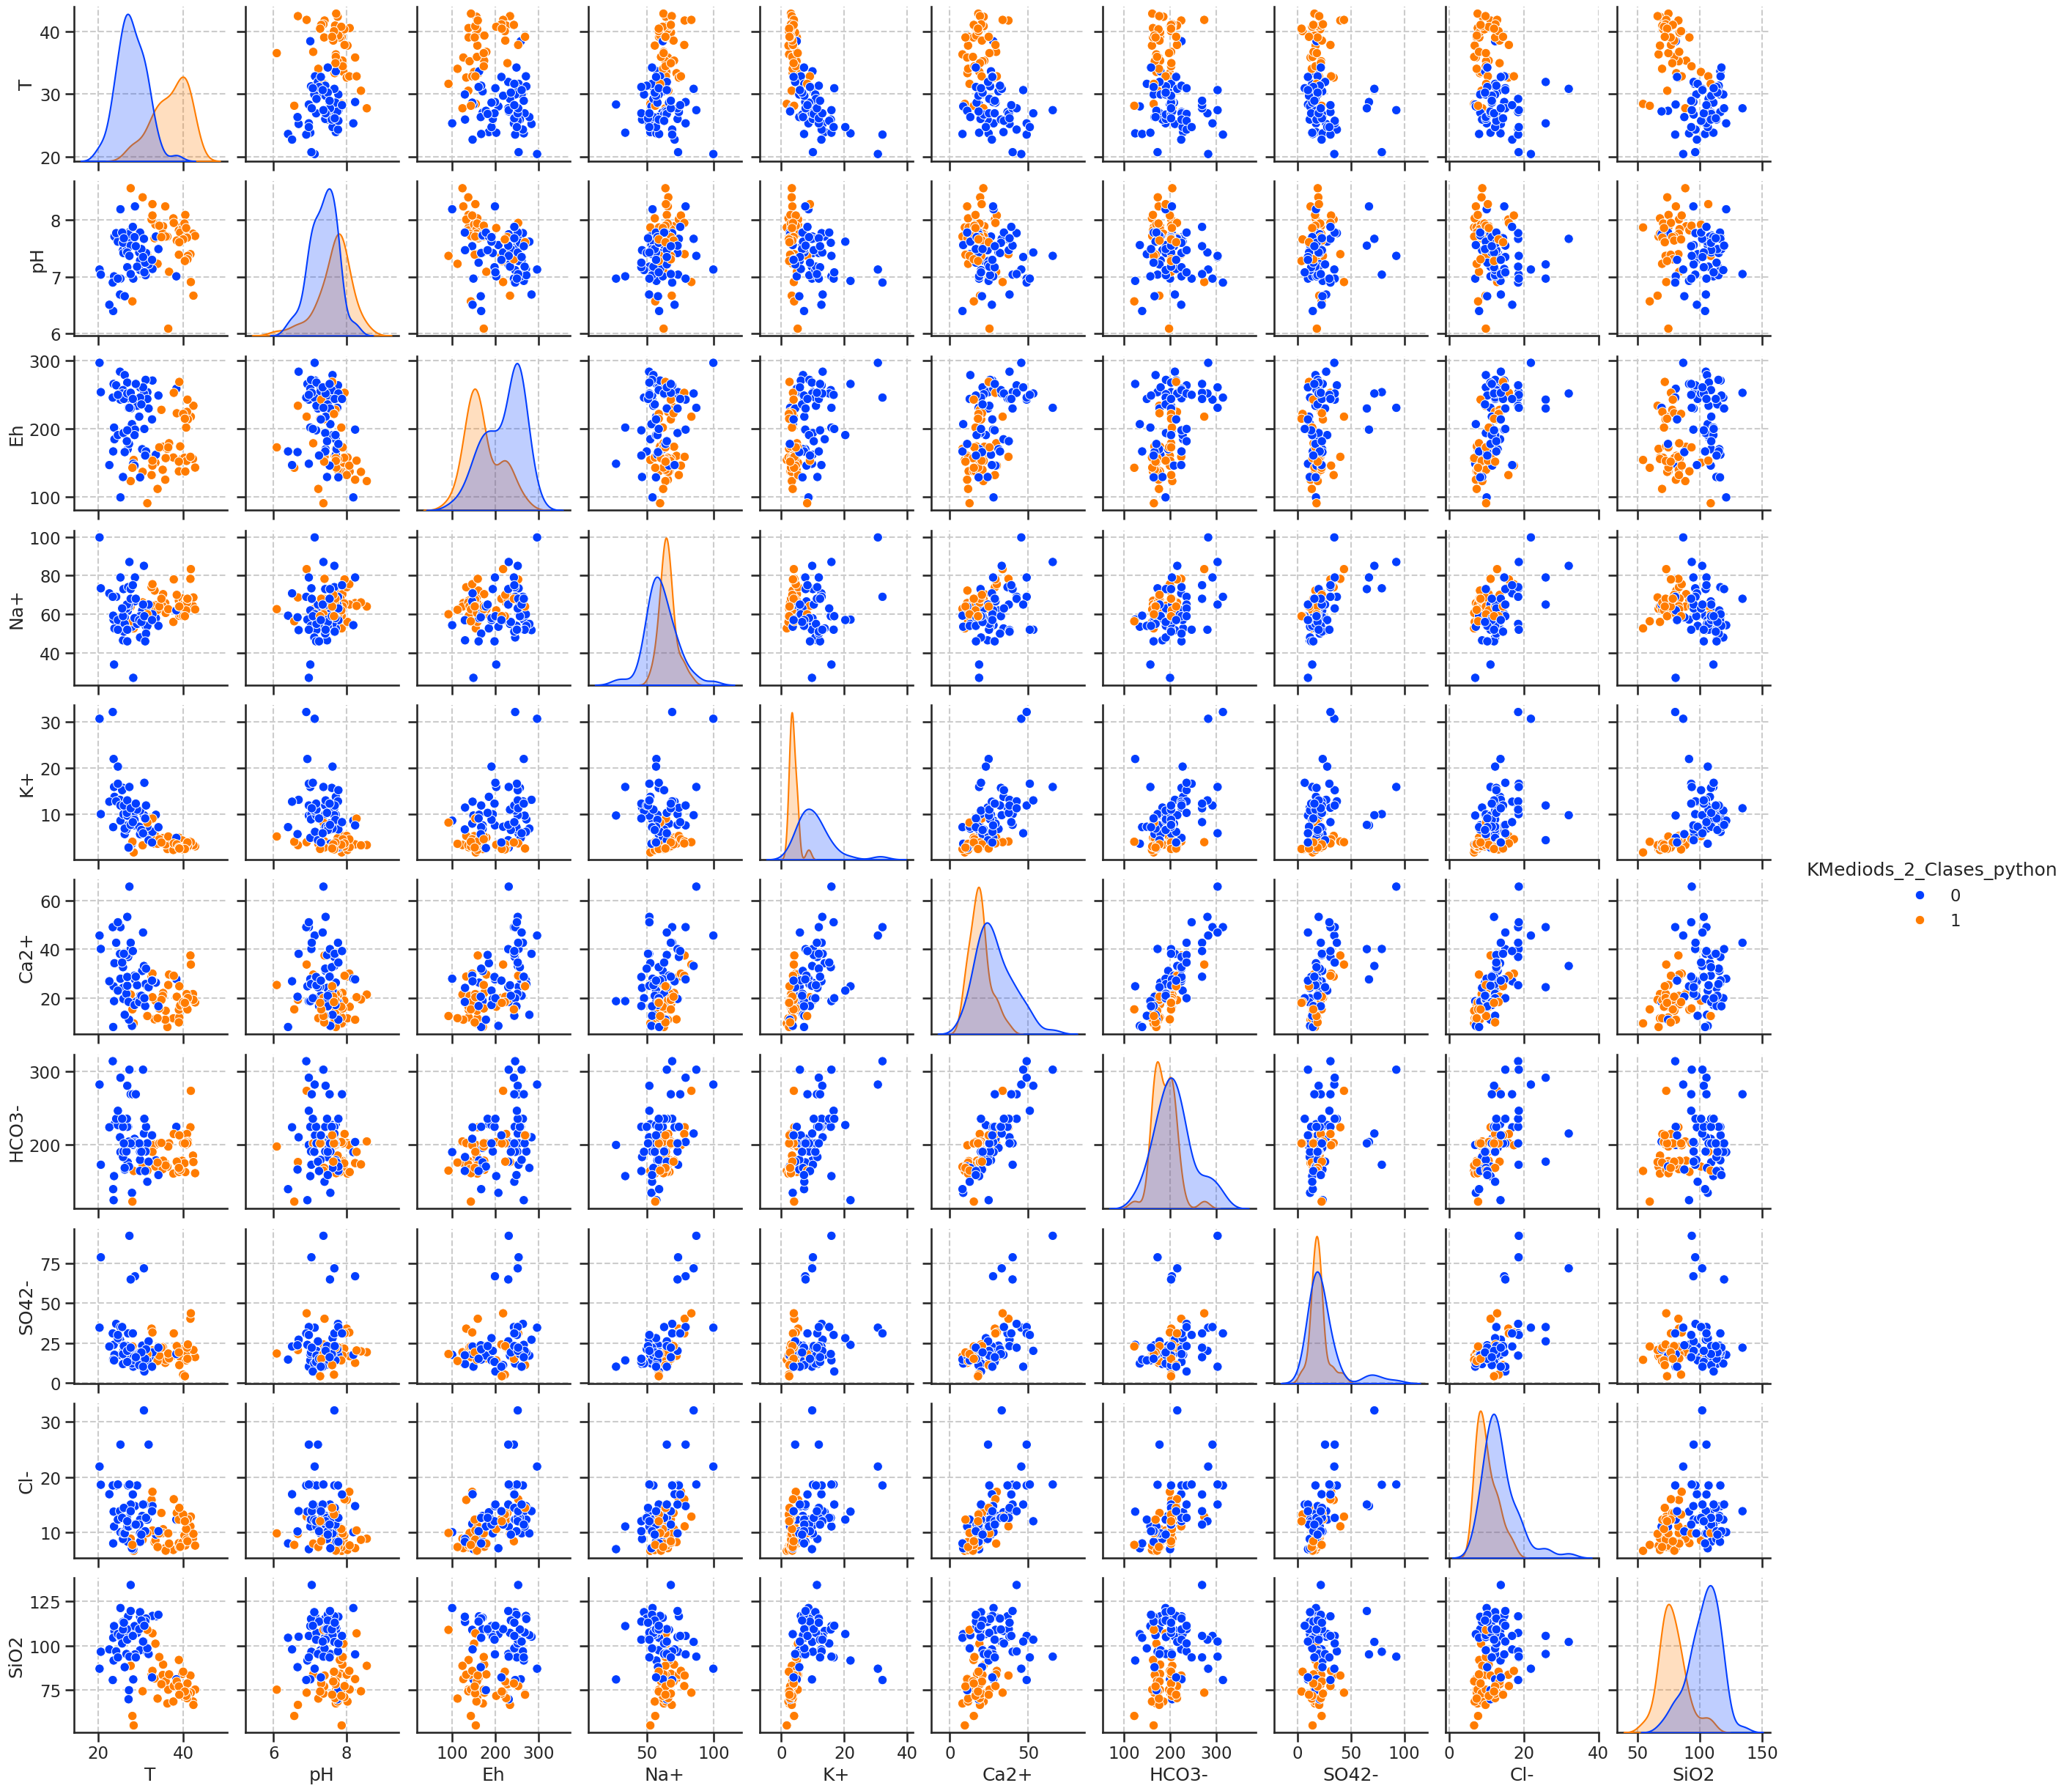

In [90]:
data = df_Clasificado[variables_para_estandarizar].copy()
data.columns=variables_para_estandarizar
data['KMediods_2_Clases_python'] = df_Clasificado['KMediods_2_Clases_python'].copy()
sns.pairplot(data, hue='KMediods_2_Clases_python', palette='bright')

In [91]:
df_clases2 = pd.DataFrame(data=df_Clasificado['KMediods_2_Clases_python'].value_counts().sort_index(ascending=True))
df_clases2.reset_index(inplace=True); df_clases2.columns = ['KMediods_2_Clases_python', 'COUNT']
df_clases2

,KMediods_2_Clases_python,COUNT
0,0,61
1,1,43


<ipython-input-92-5949ebd33b81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(ax=axes, data=df_clases2,


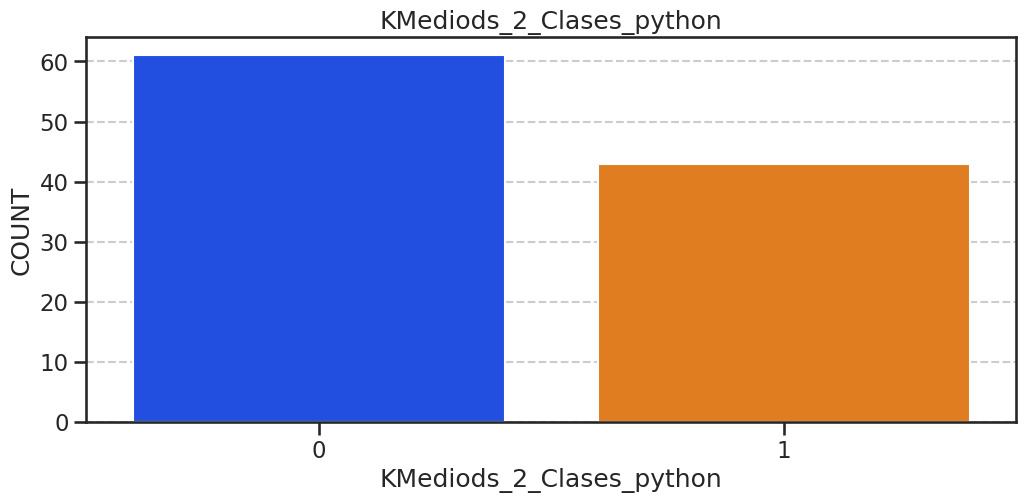

In [92]:
df_clases2 = pd.DataFrame(data=df_Clasificado['KMediods_2_Clases_python'].value_counts().sort_index(ascending=True))
df_clases2.reset_index(inplace=True); df_clases2.columns = ['KMediods_2_Clases_python', 'COUNT']
sns.color_palette('bright')
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes = sns.barplot(ax=axes, data=df_clases2,
                x=df_clases2['KMediods_2_Clases_python'],
                y=df_clases2['COUNT'], palette = 'bright').set(title='KMediods_2_Clases_python')
plt.show()

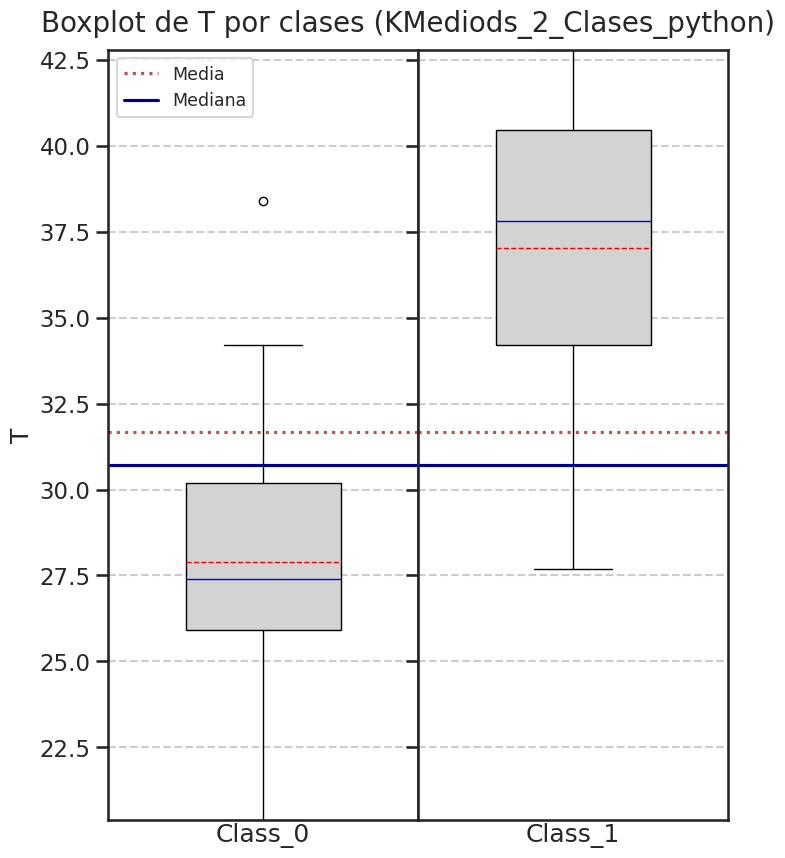

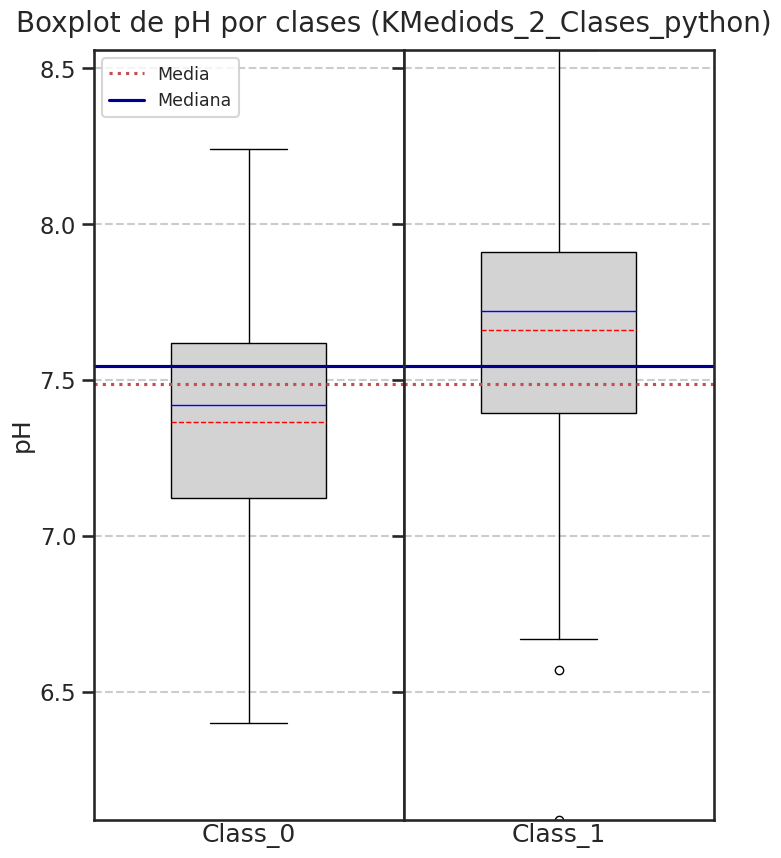

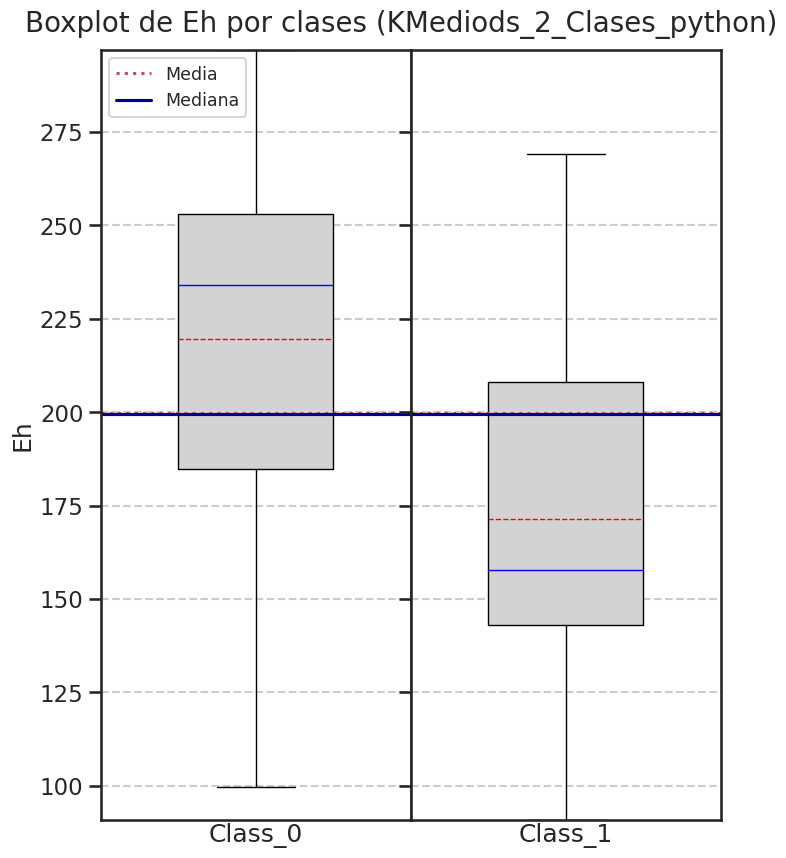

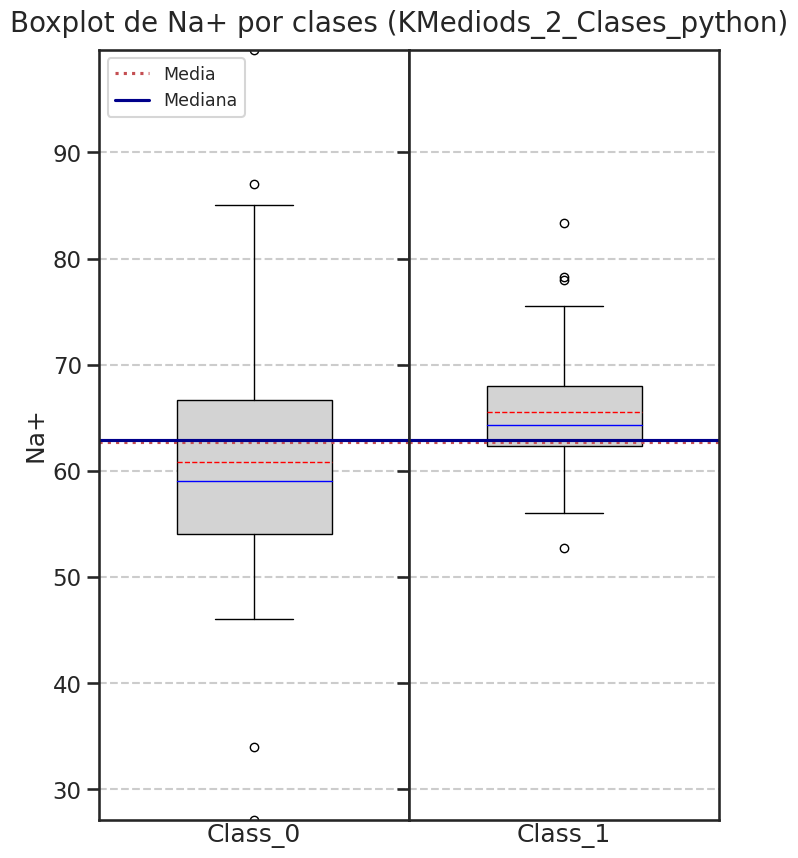

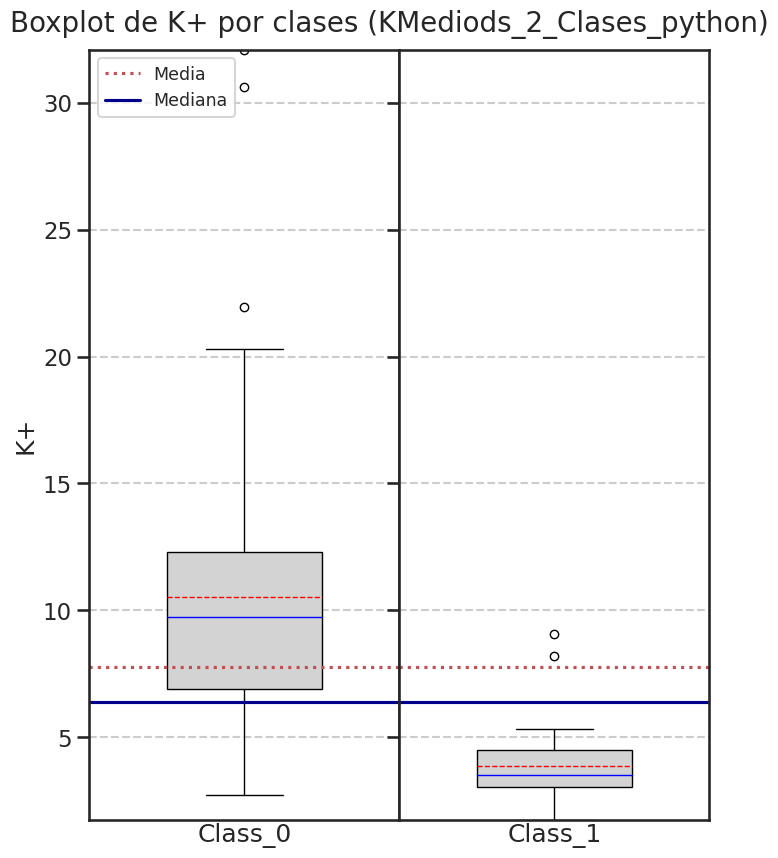

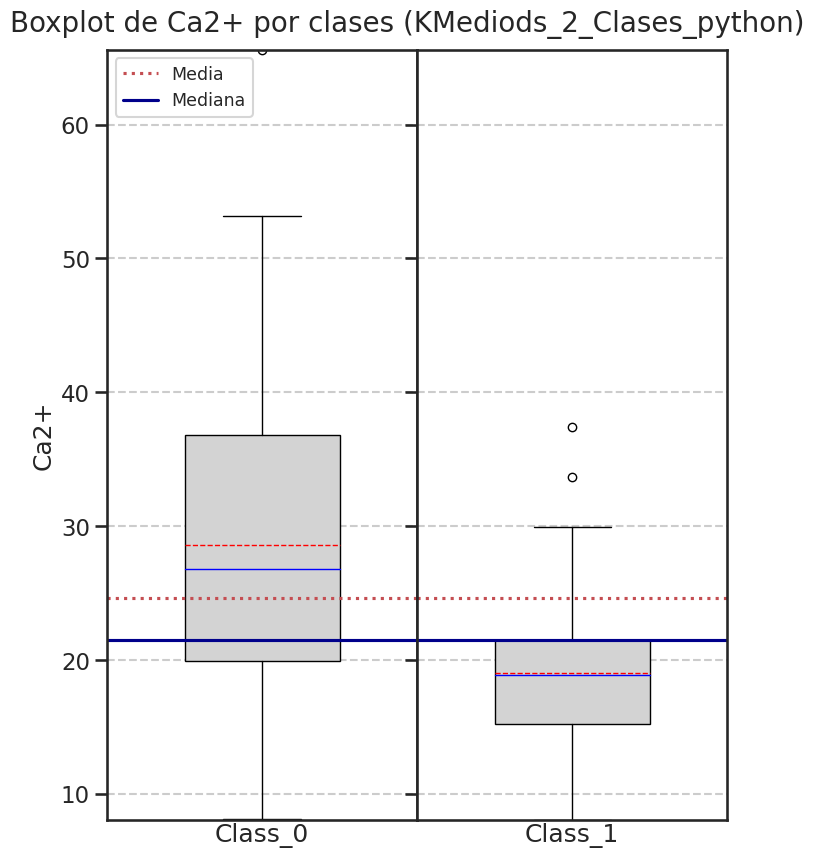

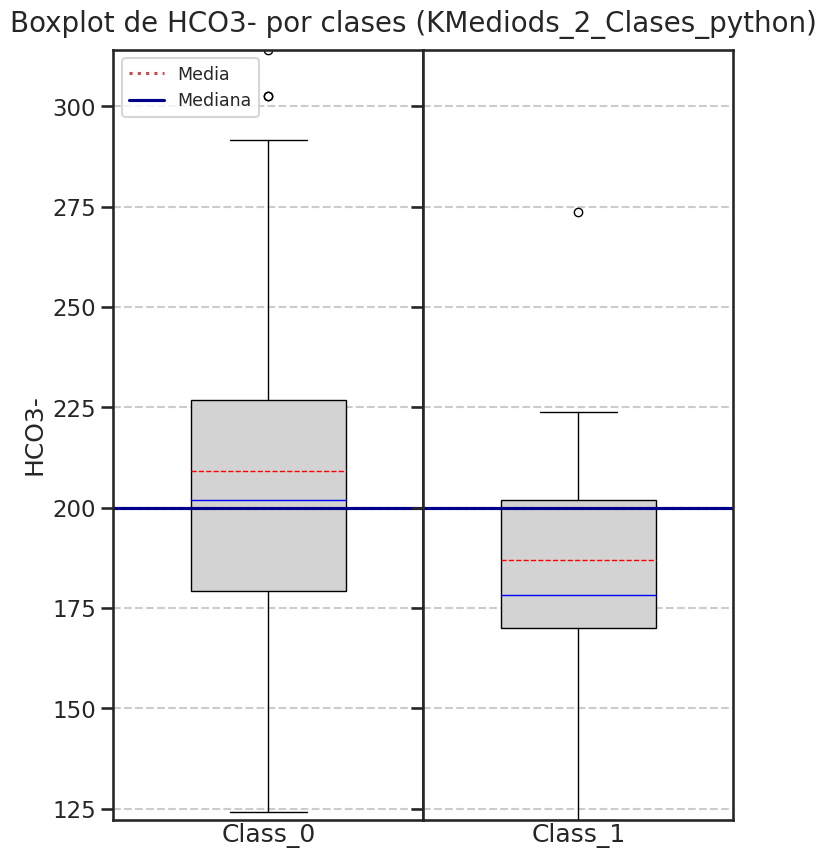

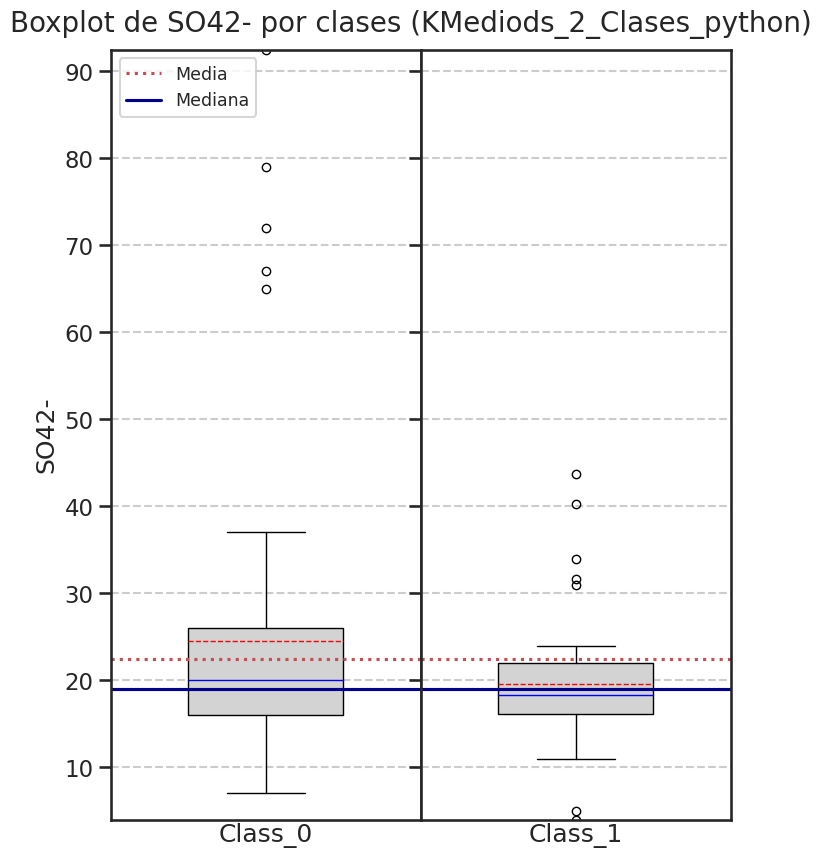

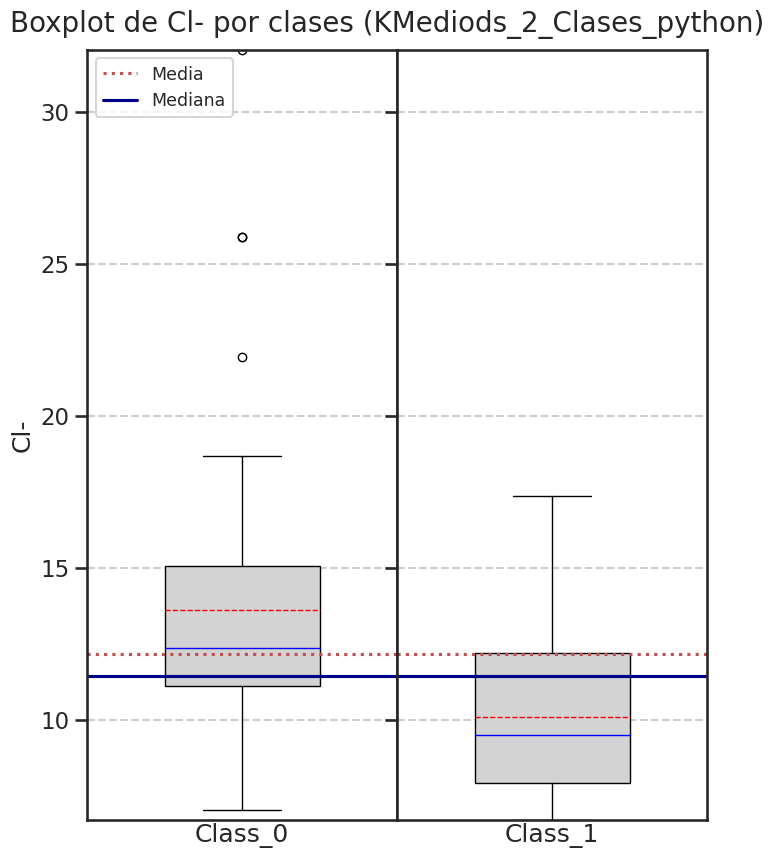

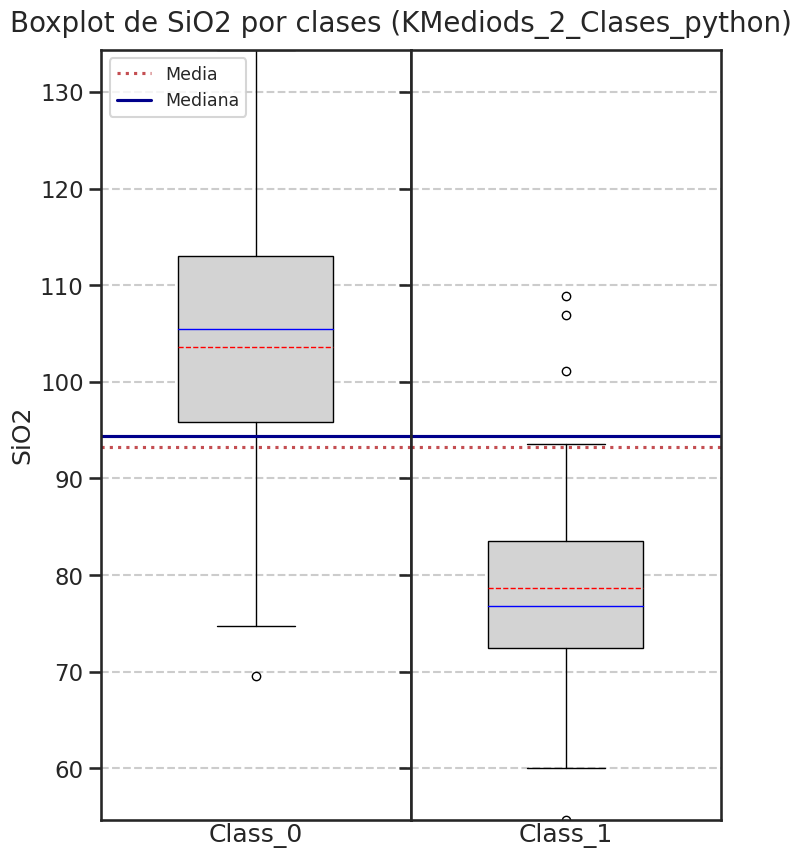

In [93]:
fig1, axs1 = Class_Boxplots(df_Clasificado, 'T', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'pH', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Eh', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Na+', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'K+', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Ca2+', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'HCO3-', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'SO42-', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'Cl-', 'KMediods_2_Clases_python');
fig1, axs1 = Class_Boxplots(df_Clasificado, 'SiO2', 'KMediods_2_Clases_python');

Con el método K-medoides considerando 2 grupos:

Las variables pH, Eh, Na+, Ca+, HCO3-, SO42+, Cl- NO se agrupan en clases bien diferenciadas, hay un traslape significativo entre los boplot de las clases.

T: Aunque las dos clases se diferencían, la cota inferior del boxplot de la segunda clase coincide con el promedio de la primera clase.

K+: Las clases se diferencían, pero el boxplot de la segunda clase se encuentra debajo del primercuartil y arriba del mínimo de la primera clase.

SiO2: Las clases se diferencían. La mediana es similar al mínimo de la primera clase y hay dos valores atípicos de la segunda clase que podrían entrar en la primera.